##SET UP

In [2]:
#Copy-and-paste the code below to use as "set-up" when your optimization model uses Pyomo and Coin-OR solvers.
#for reference, see https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/01.02-Running-Pyomo-on-Google-Colab.html#installing-pyomo-and-solvers

%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

from pyomo.environ import *

## OPTIMIZATION MODEL

In [3]:
from pyomo.environ import *

# Define the interest and revenue data separately
interest = {
    ('Team A', 'Team B'): 8, ('Team A', 'Team C'): 5, ('Team A', 'Team D'): 7,
    ('Team B', 'Team C'): 6, ('Team B', 'Team D'): 9, ('Team C', 'Team D'): 4
}

revenue = {
    ('Team A', 'Team B'): 10, ('Team A', 'Team C'): 15, ('Team A', 'Team D'): 20,
    ('Team B', 'Team C'): 12, ('Team B', 'Team D'): 17, ('Team C', 'Team D'): 13
}

teams = ['Team A', 'Team B', 'Team C', 'Team D']
max_games_per_team = 2

# Initialize the model
model = ConcreteModel()

# Decision Variables: Binary variables x[i, j] indicating if teams i and j play
model.x = Var(teams, teams, domain=Binary)

# Objective: Maximize total revenue
model.obj = Objective(expr=sum(revenue.get((i, j), 0) * model.x[i, j] for i in teams for j in teams if i < j), sense=maximize)

# Constraints

# 1. Each team can play a maximum of `max_games_per_team` games
def team_game_limit(model, i):
    return sum(model.x[i, j] for j in teams if i != j) + sum(model.x[j, i] for j in teams if i != j) <= max_games_per_team
model.team_game_limit = Constraint(teams, rule=team_game_limit)

# 2. No self-matchup: A team cannot play against itself
def no_self_matchup(model, i):
    return model.x[i, i] == 0
model.no_self_matchup = Constraint(teams, rule=no_self_matchup)

# 3. Each team must play at least one game
def team_minimum_games(model, i):
    return sum(model.x[i, j] for j in teams if i != j) + sum(model.x[j, i] for j in teams if i != j) >= 1
model.team_minimum_games = Constraint(teams, rule=team_minimum_games)

# Solve the model
solver = SolverFactory('cbc')  # Or use any solver available (like glpk, cbc, gurobi, etc.)
result = solver.solve(model, tee=True)

# Display results
if (result.solver.status == SolverStatus.ok) and (result.solver.termination_condition == TerminationCondition.optimal):
    print("Optimal solution found!")
    total_revenue = 0
    total_interest = 0
    for i in teams:
        for j in teams:
            if i < j and model.x[i, j].value == 1:  # Only consider each match once
                match_revenue = revenue.get((i, j), 0)
                match_interest = interest.get((i, j), 0)
                print(f"{i} vs {j}: Match scheduled, Revenue: {match_revenue}, Interest: {match_interest}")
                total_revenue += match_revenue
                total_interest += match_interest
    print(f"Total Revenue: {total_revenue}")
    print(f"Total Interest: {total_interest}")
else:
    print("No optimal solution found.")


Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Jun  7 2023 

command line - /content/bin/cbc -printingOptions all -import /tmp/tmp4kt_v450.pyomo.lp -stat=1 -solve -solu /tmp/tmp4kt_v450.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimization
Coin0009I Switching back to maximization to get correct duals etc
Presolve 8 (-4) rows, 12 (-4) columns and 48 (-4) elements
Statistics for presolved model
Original problem has 16 integers (16 of which binary)
Presolved problem has 12 integers (12 of which binary)
==== 6 zero objective 7 different
6 variables have objective of -0
1 variables have objective of 10
1 variables have objective of 12
1 variables have objective of 13
1 variables have objective of 15
1 variables have objective of 17
1 variables have objective of 20
==== absolute objective values 7 different
6 variables have objective of 0
1 variables have objective of 10
1 va

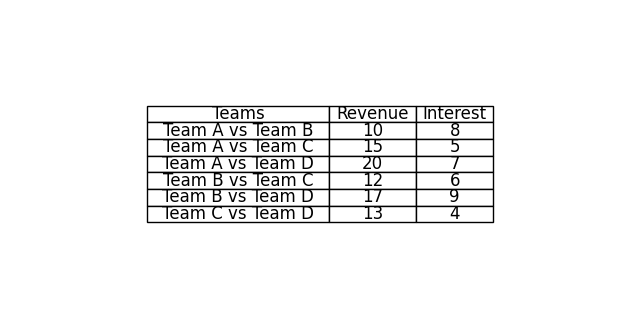

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
matches = [
    {"Teams": "Team A vs Team B", "Revenue": 10, "Interest": 8},
    {"Teams": "Team A vs Team C", "Revenue": 15, "Interest": 5},
    {"Teams": "Team A vs Team D", "Revenue": 20, "Interest": 7},
    {"Teams": "Team B vs Team C", "Revenue": 12, "Interest": 6},
    {"Teams": "Team B vs Team D", "Revenue": 17, "Interest": 9},
    {"Teams": "Team C vs Team D", "Revenue": 13, "Interest": 4}
]

# Convert data to a DataFrame
df = pd.DataFrame(matches)

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Hide the axes
ax.axis('off')
ax.axis('tight')

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Save the table as an image
#plt.savefig("match_table_slide5.png", bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()


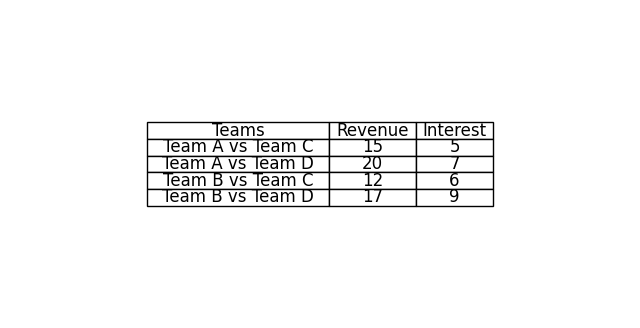

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
matches = [
    {"Teams": "Team A vs Team C", "Revenue": 15, "Interest": 5},
    {"Teams": "Team A vs Team D", "Revenue": 20, "Interest": 7},
    {"Teams": "Team B vs Team C", "Revenue": 12, "Interest": 6},
    {"Teams": "Team B vs Team D", "Revenue": 17, "Interest": 9}
]

# Convert data to a DataFrame
df = pd.DataFrame(matches)

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Hide the axes
ax.axis('off')
ax.axis('tight')

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Save the table as an image
#plt.savefig("match_table_slide5.png", bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()
